# Regresja

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats

In [17]:
data_str = '''Region Alcohol Tobacco
North 6.47 4.03
Yorkshire 6.13 3.76
Northeast 6.19 3.77
East_Midlands 4.89 3.34
West_Midlands 5.63 3.47
East_Anglia 4.52 2.92
Southeast 5.89 3.20
Southwest 4.79 2.71
Wales 5.27 3.53
Scotland 6.08 4.51
Northern_Ireland 4.02 4.56'''

Wczytajmy nasze dane

In [18]:
# Read in the data. Note that for Python 2.x,
# you have to change the "import" statement
from io import StringIO
df = pd.read_csv(StringIO(data_str), sep=r'\s+')

In [19]:
df

,Region,Alcohol,Tobacco
0,North,6.47,4.03
1,Yorkshire,6.13,3.76
2,Northeast,6.19,3.77
3,East_Midlands,4.89,3.34
4,West_Midlands,5.63,3.47
5,East_Anglia,4.52,2.92
6,Southeast,5.89,3.20
7,Southwest,4.79,2.71
8,Wales,5.27,3.53
9,Scotland,6.08,4.51


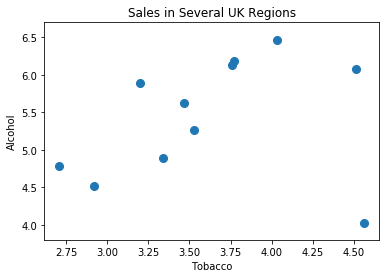

In [20]:
plt.plot(df.Tobacco, df.Alcohol, 'o', ms=8)
plt.xlabel('Tobacco')
plt.ylabel('Alcohol')
plt.title('Sales in Several UK Regions')
plt.ylim([3.8, 6.7])
plt.show()

## Uczymy nasz model
Nauczmy nasz model regresji liniowej na zbiorze danych bez ostatniej wartości (uznajemy, że jest to element odstający (outlier))

In [21]:
result = sm.ols('Alcohol ~ Tobacco', df[:-1]).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     12.78
Date:                Sun, 25 Nov 2018   Prob (F-statistic):            0.00723
Time:                        14:15:51   Log-Likelihood:                -4.9998
No. Observations:                  10   AIC:                             14.00
Df Residuals:                       8   BIC:                             14.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0412      1.001      2.038      0.0

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [22]:
print(result.params[0])
print(result.params[1])
print(result.params)

2.0412230868382117
1.005895832338759
Intercept    2.041223
Tobacco      1.005896
dtype: float64


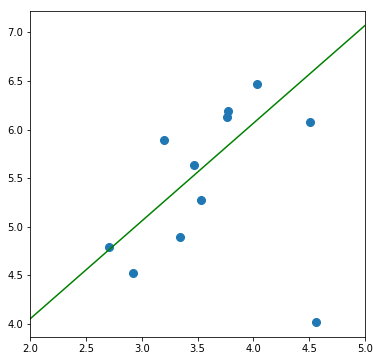

In [23]:
f_lr = lambda x: result.params[1] * x + result.params[0]
x_f_lr = np.linspace(2, 5, 200)
y_f_lr = f_lr(x_f_lr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([2, 5])
plt.plot(df.Tobacco, df.Alcohol, 'o', ms=8)
plt.plot(x_f_lr, y_f_lr, 'g');
plt.show()

# Opis
Lewa kolumna przeważnie zawiera informacje dotyczące użytej metody:

- Df (model) -- oznacza stopnie swobody modelu czyli liczbę predyktorów (zmiennych objaśniających). 
- Df (residuals) -- oznacza liczbę obserwacji pomniejszoną o stopnie swobody modelu minus jeden (dla przesunięcia).

Jeżeli oznaczymy przez
$n$ liczbą obserwacji, a $k$ liczbą parametrów regresji/modelu. 
(np. dla modelu liniowego z przykłady mamy $k=2$.), a $\hat y$ przewidywaną wartość modelu oraz $\bar y$ średnią z zaobserwowanych wartości to

- (Corrected) Model Degrees

$$
DF_{mod} =  k-1
$$

- Residuals Degrees of Freedom

$$
DF_{res} = n - k
$$

- Residuals Degrees of Freedom ($DF_{mod} + DF_{res} = DF_{tot}$)

$$
DF_{tot} = n - 1
$$




In [24]:
N = df.shape[0]-1 # size of data
k = 2.
dfm, dfe = k-1, N - k
print(N)
print(dfe)
print(dfm)

10
8.0
1.0


### Zmienność zbioru możemy mierzyć różnymi miarami:

- Model Sum of Squares (Explained Sum of Squares)
$$
SS_{mod} = \sum_{i=1}^{n} (\hat y_i - \bar y)^2
$$

- Residuals Sum of Squares (sum of squares for the errors)
$$
SS_{res} = \sum_{i=1}^{n} (y_i - \hat y_i)^2
$$

- Total Sum of Squares (równoważna wariancji próbki pomnożonej przez ($n-1$).
$$
SS_{tot} = \sum_{i=1}^{n} (y_i - \bar y)^2
$$

- Model Mean of Squares

$$
MS_{mod} = SS_{mod}/DF_{mod}
$$

- Residuals Mean of Squares (jest estymatorem nieobciążonym $\sigma^2$)

$$
MS_{res} = SS_{res}/DF_{res}
$$

- Total Mean of Squares

$$
MS_{tot} = SS_{tot}/DF_{tot}
$$

### $R^2$ Value wyraża się wzorem 

$$
R^2 = 1-\frac{SS_{res}}{SS_{tot}} = \frac{SS_{model}}{SS_{tot}}
$$
Adjusted $\bar R^2$ Value jest modyfikacją $R^2$ biorącą pod uwagę karę za dużą liczbę parametrów w modelu $p$:

$$
1-\bar R^2 = \frac{ResidualVariance}{TotalVariance},
$$

gdzie (Sample) Residual Variance to

$$
ResidualVariance=SS_{res}/DF_{res}=SS_{res}/(n-k)
$$

(Sample) Total Variance to

$$
ResidualVariance=SS_{tot}/DF_{tot}=SS_{tot}/(n-1)
$$





# Zadanie 1
Proszę wyliczyć 
<ul>
<li>ss_res</li>
<li>ss_tot</li>
<li>R</li>
<li>$\bar R$</li>
</ul>

In [25]:
y=np.array(df[:-1].Alcohol)
x=np.array(df[:-1].Tobacco)
n = len(x) # number of samples    
f = lambda x: result.params[1] * x + result.params[0]
mean_y = np.mean(y)


ss_res=np.sum( (y-f(x))**2 )
ss_tot=np.sum( (y-mean_y)**2 )
ss_mod=np.sum( (f(x)-mean_y)**2 )

R=1-ss_res/ss_tot
bar_R=1-(ss_res/dfe)/(ss_tot/(n-1))

print( r'ss_res = %.3f' % ss_res)
print( r'ss_tot = %.3f' % ss_tot)
print( r'R = %.3f' % R)
print( r'\bar R = %.3f' % bar_R)

ss_res = 1.591
ss_tot = 4.135
R = 0.615
\bar R = 0.567


# The F-Test for regression

W przypadku modelu regresji:

$$
Y_i = \alpha + \beta_1X_{1j}+\ldots+\beta_n X_{nj} + \epsilon_i = \alpha + \sum_{i=1}^{n} \beta_{i} X_{ij}+\epsilon_j .
$$

Chcemy przetestować hipotezę:

$$
H_{0}: \beta_1=\beta_2=\ldots\beta_n=0
$$

vs

$$
H_{1}: \beta_{j} \neq 0 \mbox{ dla co najmniej jednego } j
$$

Pamiętamy, że jeżeli zmienne losowe $t_1,t_2,\ldots,t_m$ są niezależne o rozkładzie normalnym $N(0,\sigma^2)$ to

$$
\sum_{i=1}^{m}\frac{t_i^2}{\sigma^2}
$$

ma rozkład chi-kwadrat z $m$ stopniami swobody.

W konsekwencji, jeżeli hipoteza zerowa jest prawdziwa to:

- $SS_{res}/\sigma^2$ ma rokład $\chi^2$ z $DF_{res}$ stopniami swobody

- $SS_{mod}/\sigma^2$ ma rokład $\chi^2$ z $DF_{mod}$ stopniami swobody

- $SS_{res}$ oraz $SS_{mod}$ są niezależne

Jeżeli zmienna losowa $U$ ma rozkład $\chi^2$ z $n$ stopniami swobody oraz $V$ jest zmienną losową o rozkładzie $\chi^2$ z $m$ stopniami swobody to 

$$
F=\frac{U/n}{V/m}
$$

ma rozkład F z $(n,m)$ stopniami swobody.

Jeżeli hipoteza $H_0$ jest prawdziwa to

$$
F=\frac{(SS_{mod}/\sigma^2)/DF_{mod}}{(SS_{res}/\sigma^2)/DF_{res}} = \frac{SS_{mod}/DF_{mod}  }{ SS_{res}/DF_{res} }
$$

ma rozkład z ($DF_{mod},DF_{res}$) stopniami swobody i jest niezależna od $\sigma$.


# Zadanie 2
Proszę wyliczyć 
<ul>
<li>statystykę testową F</li>
<li>p-value</li>
</ul>

In [26]:
ss_mod=np.sum( (f(x)-mean_y)**2 )
print(result.mse_resid)
print(ss_res/dfe)
print(result.mse_model)
print(ss_mod/dfm)

0.19893407797059245
0.19893407797059245
2.5433673762352615
2.543367376235256


In [27]:
F = (ss_mod/dfm)/ (ss_res/dfe)
p = 1.0 - stats.f.cdf(F,dfm,dfe)
print('F-statistic: {:.3f}, p-value: {:.5f}'.format( F, p ))

F-statistic: 12.785, p-value: 0.00723


# Log-Likelihood Function

Dla klasycznej regresji liniowej mamy
$$
\epsilon = y_{i}-\sum_{k=1}^{n} \beta_{k} x_{ik} = y_i - \hat y_{i} \thicksim N(0,\sigma)
$$

W konsekwencji wiemy, że 

$$
p(\epsilon_i)=f(\frac{y_i-\hat y_i}{\sigma})
$$

gdzie $f$ jest gęstością standardowego rozkładu normalnego.

Zakładając niezależność między błędami mamy funkcję wiarygodności:

$$
l_{total}=\prod_{i=1}^{n} p(\epsilon_i).
$$

Logarytmiczną funkcją wiarygodności (Log Likelihood function) nazywamy:

$$
L=\ln(l)=\ln\left(\prod_{i=1}^{n} f(\frac{y_i-\hat y_i}{\sigma}) \right)
$$

$$
L=\ln(l)=\ln\left(\prod_{i=1}^{n} \frac{1}{\sigma\sqrt{2\pi}} \exp\left( - \frac{ (y_i-\hat y_i)^2 }{2\sigma^2} \right) \right)=
$$
$$
=\sum_{i=1}^{n} \left( \ln\left( \frac{1}{\sigma\sqrt{2\pi}}\right) - \left( \frac{ (y_i-\hat y_i)^2 }{2\sigma^2} \right)\right) 
$$

Można pokazać, że estymatorem największej wiarygodności wariancji jest

$$
\sigma^2 = \frac{SS_{res}}{n}.
$$

# Zadanie 3
Proszę wyliczyć 
<ul>
<li>ln(L)</li>
</ul>

In [28]:
s2 = ss_res / n
L = (1.0/np.sqrt(2*np.pi*s2)) ** N*np.exp(-ss_res/(s2*2.0))
print(r'ln(L) =  %.4f' % np.log( L ))

ln(L) =  -4.9998


Innymi powszechnie spotykanymi kryteriami jest Akaike Information Criterion (AIC)  oraz Bayesian Information Criterion (BIC), które opierają się na funkcji wiarygodności. Obydwa dwie miary wprowadzają kary za złożoność modelu, ale AIC kara mniej za złożoność niż BIC. 

Kryterium Informacyjne Akaike (AIC):

$$
AIC = 2\cdot k-2\cdot \ln(L)
$$

Bayesian Information Criterion (BIC):

$$
BIC = k \cdot \ln(N)-2 \cdot \ln(L)
$$

gdzie, $N$ jest liczbą obserwacji, $k$ jest liczbą parametrów, a $L$ jest funkcją wiarygodności. 

Powinniśmy wybrać model o niższej wartości AIC lub BIC.

# Zadanie 4
Proszę wyliczyć 
<ul>
<li>AIC</li>
<li>BIC</li>
</ul>

In [29]:
AIC = 2*k-2*np.log(L)
BIC = k *np.log(N)-2 * np.log(L)
print(r'AIC =  %.2f' % AIC)
print(r'BIC =  %.2f' % BIC)

AIC =  14.00
BIC =  14.60


Parametr $\beta$ możemy łatwo otrzymać wyznaczając macierz odwrotną do $X$

$$
\beta=(X^T X)^{-1} X^T y. 
$$

# Zadanie 5
Proszę wyliczyć 
<ul>
<li>$\beta$</li>
</ul>

In [30]:
X = df.Tobacco[:-1]
Y = np.matrix(df.Alcohol[:-1])
X = np.vstack(( np.ones(X.size), X ))
X = np.matrix( X )
C = np.linalg.inv( X * X.T )
Y*(X.T*C)

matrix([[2.04122309, 1.00589583]])

W celu uzyskania odchylenia standardowego współczynników obliczymy macierz kowariancji dla $\beta$:

$$
C = cov(\beta)= \sigma^2(X^T X)^{-1}, \mbox{ gdzie } \sigma^2 \mbox{ jest wariancją } \hat y_i.
$$

Błąd standardowy jest dany przez pierwiastki wartości na digonali macierzy kowariancji.

# Zadanie 6
Proszę wyliczyć 
<ul>
<li> odchylenia standardowego współczynników $\beta$</li>
</ul>

In [31]:
# multiply by the mean squared error of the residual
mse_res=(ss_res/dfe)
C *= mse_res
# take the square root
SE = np.sqrt(C)
print(SE)

[[1.00136021        nan]
 [       nan 0.28132158]]


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


możemy użyć testu t-Studenta, aby przetestować hipotezę zerową mówiącą, że 

<i>współczynnik wynosi zero, co sugeruje, że dany predykator nie ma znaczącego wpływu na zmienną objaśnianą. </i>

Statystyka t jest dana wzorem

$$
t_i=\frac{\beta}{SE_{ii}}.
$$

# Zadanie 7
Proszę wyliczyć 
<ul>
<li> statystykę testową t dla parametrów $\beta$</li>
</ul>

In [32]:
i = 1
beta = result.params[i]
se = SE[i,i]
t = beta / se
print('t =', t)
N = result.nobs
k = result.df_model + 1
dof = N - k
p_onesided = 1.0 - stats.t( dof ).cdf( t )
p = p_onesided * 2.0
print('p = {0:.3f}'.format(p))

t = 3.575608454239008
p = 0.007


In [33]:
i = 0
beta = result.params[i]
se = SE[i,i]
t = beta / se
print('t =', t)
N = result.nobs
k = result.df_model + 1
dof = N - k
p_onesided = 1.0 - stats.t( dof ).cdf( t )
p = p_onesided * 2.0
print('p = {0:.3f}'.format(p))

t = 2.038450356297816
p = 0.076


Przedział ufności dany jest wzorem

$$
CI = \beta_i \pm PPF(0.975) \cdot SE_{i,i}.
$$

# Zadanie 8
Proszę wyliczyć 
<ul>
<li> przedziały ufności dla statystyk $t_1$ i $t_2$</li>
</ul>

In [18]:
i = 0
# the estimated coefficient, and its variance
beta, c = result.params[i], SE[i,i]
# critical value of the t-statistic
N = result.nobs
P = result.df_model
dof = N - P - 1
z = stats.t( dof ).ppf(0.975) # 1 - 0.05/2
# the confidence interval
print(beta - z * c, beta + z * c)

-0.267917709371 4.35036388305


In [19]:
i = 1
# the estimated coefficient, and its variance
beta, c = result.params[i], SE[i,i]
# critical value of the t-statistic
N = result.nobs
P = result.df_model
dof = N - P - 1
z = stats.t( dof ).ppf(0.975) # 1 - 0.05/2
# the confidence interval
print(beta - z * c, beta + z * c)

0.357167097503 1.65462456717


Skośność i kurtoza odnoszą się do kształtu rozkładu. Skośność jest miarą asymetrii rozkładu, a kurtoza jest miarą jego krzywizny (grube ogony):

$$
S=\frac{\hat \mu_3}{\hat \sigma^3}=\frac{\frac{1}{N} \sum_{i=1}^{N} (y_i -\hat y_{i} )^3 }{ \left( \frac{1}{N} \sum_{i=1}^{N} (y_i -\hat y_{i} )^2 \right)^{3/2}}
$$

$$
K=\frac{\hat \mu_4}{\hat \sigma^4}=\frac{\frac{1}{N} \sum_{i=1}^{N} (y_i -\hat y_{i} )^4 }{ \left( \frac{1}{N} \sum_{i=1}^{N} (y_i -\hat y_{i} )^2 \right)^{2}}
$$

Kurtozę definiuje się jako $K-3$ gdysz rozkłady normalne mają kurtozę równą $3$.

# Zadanie 9
Proszę wyliczyć 
<ul>
<li>skośność</li>
<li>kurtozę</li>
</ul>

In [20]:
#d = Y - result.fittedvalues
d = y - f(x)
S = np.mean( d**3.0 ) / np.mean( d**2.0 )**(3.0/2.0)
# equivalent to:
# S = stats.skew(result.resid, bias=True)
K = np.mean( d**4.0 ) / np.mean( d**2.0 )**(4.0/2.0)
# equivalent to:
# K = stats.kurtosis(result.resid, fisher=False,
# bias=True)
print('Skewness: {:.3f}, Kurtosis: {:.3f}'.format(S,K))

Skewness: -0.014, Kurtosis: 1.527


## Omnibus Test
Omnibus Test wykorzystuje skośność i kurtozę, aby przetestować hipotezę zerową mówiącą, że rozkład błędów (residuals) jest normalny. 

Jeśli otrzymamy bardzo małą p-value dla  Omnibus Test, wówczas błędy nie pochodzą a rozkładu normalnego. 

# Zadanie 10
Proszę wykonać Omnibus test. 

In [21]:
(K2, p) = stats.normaltest(result.resid)
print('Omnibus: {0:.3f}, p = {1:.3f}'.format(K2, p))

Omnibus: 2.542, p = 0.281


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


## Test Durbin-Watson
Durbin-Watson jest testem  używany do wykrywania obecności autokorelacji (relacji pomiędzy wartościami oddzielonymi od siebie określonym czasem opóźnienia) w błędach. U nas opóźnienie jest jedno:

$$
DW=\frac{ \sum_{i=1}^{N} ( (y_i -\hat y_{i}) - (y_{i-1} - \hat y_{i-1} ) )^2 }{\sum_{i=1}^{N} (y_i -\hat y_{i} )^2}
$$


Jeśli statystyka Durbin-Watson jest znacznie mniejsza od 2, to dane są skorelowane dodatnio. W zasadzie, jeśli statystyka Durbin-Watsona jest mniejszy niż $1.0$, to należy zastanowić się nad zmianą modelu.

# Zadanie 11
Proszę wykonać Durbin-Watson test (można użyć <tt>np.diff</tt>).

In [47]:
DW = np.sum( np.diff( f(x) - y )**2.0 ) /  ss_res
print('Durbin-Watson: {:.5f}'.format( DW ))

Durbin-Watson: 1.97535


In [48]:
DW = np.sum( np.diff( result.resid.values )**2.0 ) / result.ssr
print('Durbin-Watson: {:.5f}'.format( DW ))

Durbin-Watson: 1.97535


## Test Jarque-Bera
Test Jarque-Bera to kolejny test, który uwzględnia skośność (S) i kurtozę (K).
Hipoteza zerowa mówi, że rozkład jest normalny w sensie zerowej skośność i kurtozy

Niestety, przy małych próbkach, test Jarque-Bera jest podatny na odrzucenie hipotezy zerowej (że rozkład jest normalny) gdy nie powinien.

$$
JB=\frac{N}{6}\left( S^2 + \frac{1}{4}(K-3)^2  \right)
$$

Statystyka Jarque–Bera ma rozkład chi kwadrat z dwoma stopniami swobody.

# Zadanie 12
Proszę wykonać Jarque-Bera test.

In [23]:
JB = (N/6.0) * ( S**2.0 + (1.0/4.0)*( K - 3.0 )**2.0 )
p = 1.0 - stats.chi2(2).cdf(JB)
print('JB-statistic: {:.5f}, p-value: {:.5f}'.format( JB, p ))

JB-statistic: 0.90421, p-value: 0.63629


## Condition Number
Condition Number - określa czułość wyjścia funkcji na jego wejście. Gdy dwie zmienne objaśniające są wysoce skorelowane mała zmiana w danych lub modelu drastycznie zmienia wyniki. W idealnej sytuacji podobne modele powinny dawać podobne wyniki.

Condition Number obliczamy wyznaczając wartości własne $X^TX$ (w tym wektora stałych), a następnie biorąc pierwiastek ze stosunku największej wartości własnej do najmniejszej. 

Jeśli Condition Number przekracza 30, to model regresji powinien zostać zmieniony.

# Zadanie 13
Proszę wyliczyć Condition Number.

In [24]:
X = np.matrix(X)
EV = np.linalg.eig( X * X.T )
print(EV)
CN = np.sqrt( EV[0].max() / EV[0].min() )
print('Condition No.: {:.5f}'.format( CN ))

(array([   0.18412885,  136.51527115]), matrix([[-0.96332746, -0.26832855],
        [ 0.26832855, -0.96332746]]))
Condition No.: 27.22887


# Zadanie 14

Wykonaj regresję dla danych z ostatnim elementem, który został przez nas uznany za element odstający (outlier).
Porównaj wyniki.

In [27]:
result = sm.ols('Alcohol ~ Tobacco', df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.4735
Date:                Mon, 08 May 2017   Prob (F-statistic):              0.509
Time:                        13:14:12   Log-Likelihood:                -12.317
No. Observations:                  11   AIC:                             28.63
Df Residuals:                       9   BIC:                             29.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.3512      1.607      2.708      0.0

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


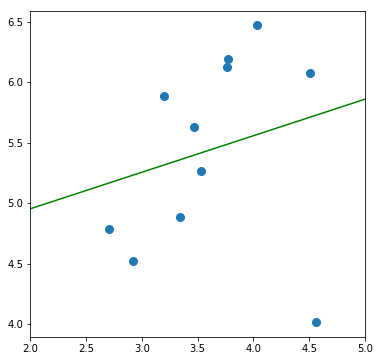

In [28]:
f_lr = lambda x: result.params[1] * x + result.params[0]
x_f_lr = np.linspace(2, 5, 200)
y_f_lr = f_lr(x_f_lr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([2, 5])
plt.plot(df.Tobacco, df.Alcohol, 'o', ms=8)
plt.plot(x_f_lr, y_f_lr, 'g');
plt.show()
